In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

ERROR! Session/line number was not unique in database. History logging moved to new session 59
Saving Frozen_Dessert_Production.csv to Frozen_Dessert_Production.csv


In [ ]:
df = pd.read_csv('Frozen_Dessert_Production.csv')

In [ ]:
df

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636
...,...,...
568,2019-05-01,114.5613
569,2019-06-01,124.9605
570,2019-07-01,110.2632
571,2019-08-01,102.6085


In [ ]:
df = pd.read_csv('Frozen_Dessert_Production.csv',index_col='DATE',parse_dates=True)

In [ ]:
df

,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632


In [ ]:
df.columns = ['Production']

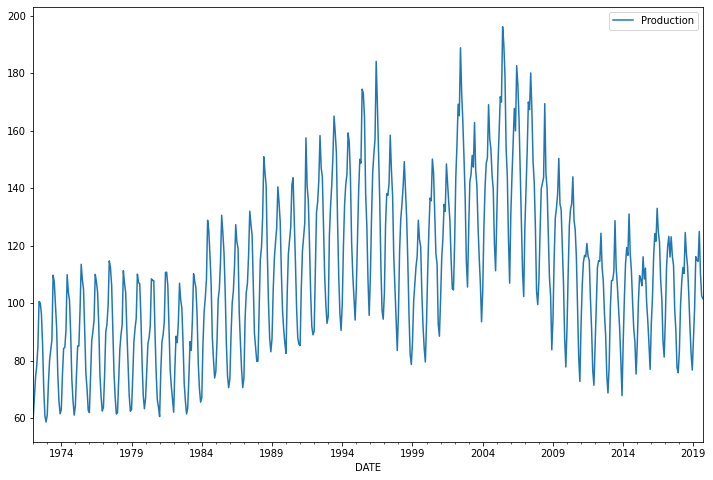

In [ ]:
df.plot(figsize=(12,8))

In [ ]:
len(df)

573

In [ ]:
test_size = 24
test_ind = len(df) - test_size
test_ind

549

In [ ]:
train = df.iloc[:test_ind]
test=df.iloc[test_ind:]
print(len(train))
print(len(test))

549
24


In [ ]:
from sklearn.preprocessing import MinMaxScaler

ERROR! Session/line number was not unique in database. History logging moved to new session 60


In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
length = 18
n_features=1

generator = TimeseriesGenerator(scaled_train,scaled_train,
                                length=length,batch_size=1)

In [ ]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,
                                           length=length,batch_size=1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()

model.add(LSTM(100,input_shape=(length,n_features))) #this will use the default activation
#function since we aren't specifying

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
model.fit_generator(generator=generator,epochs=20,validation_data=validation_generator,
                    callbacks=[early_stop])

Epoch 1/20
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
531/531 [==============================] - 16s 30ms/step - loss: 0.0207 - acc: 0.0019 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 2/20
531/531 [==============================] - 14s 26ms/step - loss: 0.0049 - acc: 0.0019 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 3/20
531/531 [==============================] - 13s 25ms/step - loss: 0.0039 - acc: 0.0019 - val_loss: 0.0036 - val_acc: 0.0000e+00


In [ ]:
losses = pd.DataFrame(model.history.history)

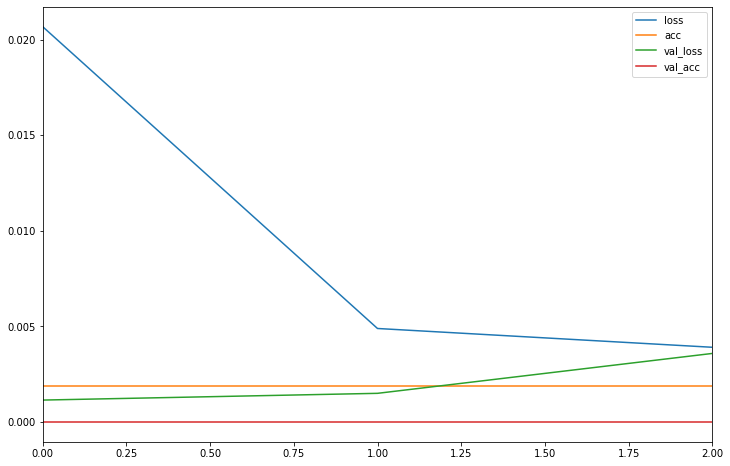

In [ ]:
losses.plot(figsize=(12,8))

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):

  current_pred = model.predict(current_batch)[0]

  test_predictions.append(current_pred)

  current_batch= np.append(current_batch[:,1:,:],[[current_pred]],axis=1)




In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_predictions
test #oh no das pretty off

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Production,Predictions
DATE,,
2017-10-01,90.4732,92.229015
2017-11-01,77.4378,87.668673
2017-12-01,75.8118,88.124913
2018-01-01,83.4343,95.554656
2018-02-01,99.4899,105.267281
2018-03-01,107.3152,115.693044
2018-04-01,112.4309,123.938792
2018-05-01,110.3544,129.168269
2018-06-01,124.5841,128.754520


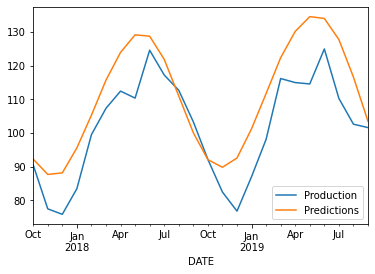

In [ ]:
test.plot()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
np.sqrt(mean_squared_error(test['Production'],test['Predictions']))

11.176251376960408